# Univariate Feature Analysis

## Introduction
In this section we will go through the data analytics process of Univariate Feature Analysis.

To skip directly to to particular parts, use the following links:
1. **[Libraries / Reading Data](#libraries_reading-data)**
2. **[Feature: Country | Bar-Plot](#country_bar)**
3. **[Feature: City | Bar-Plot](#city_bar)**
4. **[Feature: Industries | BarH-Plot](#industries_barh)**
5. **[Feature: Age | Hist-Chart](#age_hist)**
6. **[Feature: Gender | Pie-Chart](#gender_pie)**
7. **[Feature: Wealth-Source | Pie-Chart](#wealth_source_pie)**




<a id="libraries_reading-data"></a>
## 1. Libraries / Reading Data

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')

In [98]:
df = pd.read_csv("../../data/cleaned_data.csv")

In [99]:
media_dir_univariate = os.path.join("media/univariate_analysis")

<a id="country_bar"></a>
## 2. Feature: Country | Bar-Plot

In [100]:
country_counts = df['country'].value_counts()
country_counts

country
United States    750
China            504
India            157
Germany           87
Russia            79
                ... 
Portugal           1
Georgia            1
Colombia           1
Uzbekistan         1
Armenia            1
Name: count, Length: 65, dtype: int64

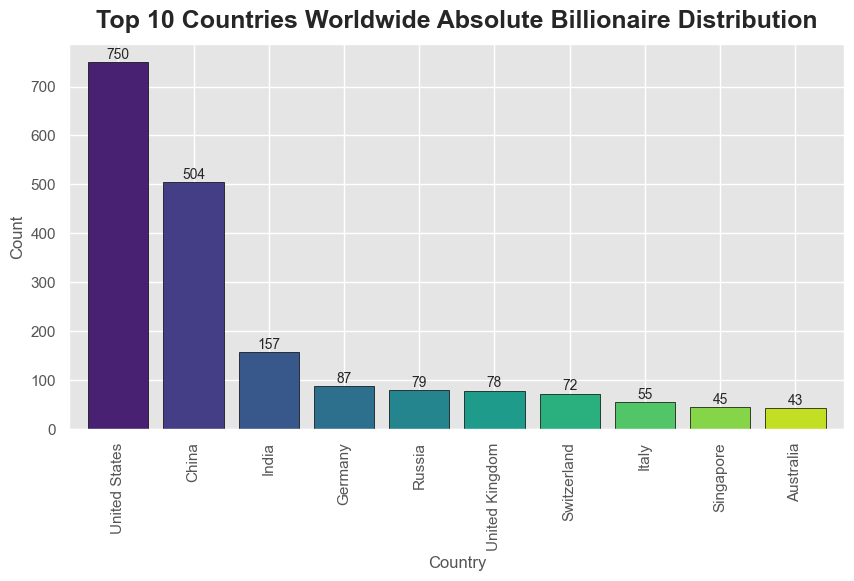

In [101]:
country_counts_top_10 = country_counts.head(10).sort_values(ascending=False)
# Use a seaborn color palette
colors = sns.color_palette('viridis', len(country_counts_top_10))

ax = country_counts_top_10.plot(kind='bar',
                                figsize=(10, 5),
                                color=colors,
                                edgecolor='black',
                                width=0.8)

plt.title('Top 10 Countries Worldwide Absolute Billionaire Distribution',
          fontsize=18,
          fontweight='bold',
          y=1.02)
ax.set_ylabel('Count')
ax.set_xlabel('Country')
for i, count in enumerate(country_counts_top_10):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
file_name_1 = "Top_10_Countries_Worldwide_Absolute_Billionaire_Distribution.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_1), bbox_inches='tight')
plt.show()

<a id="city_bar"></a>
## 3. Feature: City | Bar-Plot

In [102]:
city_counts = df['city'].value_counts().sort_values(ascending=False)
city_counts

city
New York     99
Beijing      66
Shanghai     60
Moscow       60
London       59
             ..
Potsdam       1
Surat         1
Joinville     1
Paoli         1
Makati        1
Name: count, Length: 711, dtype: int64

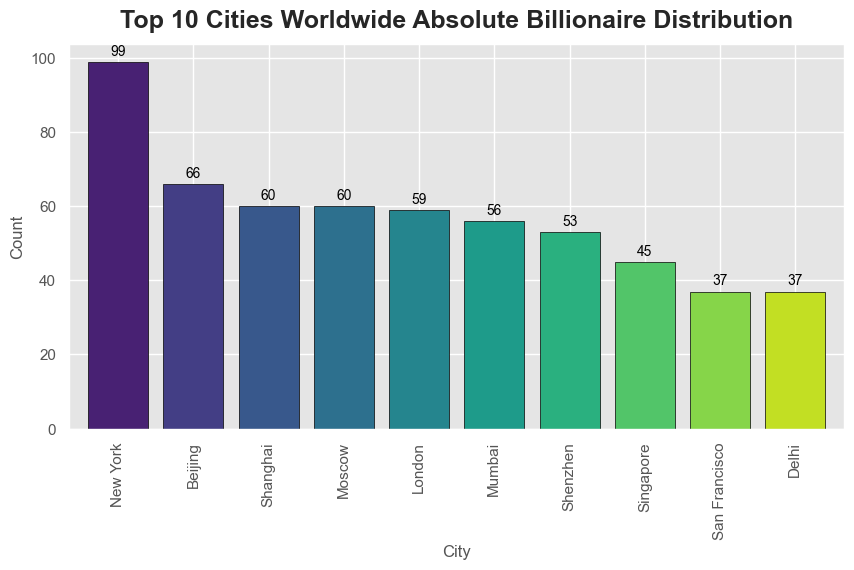

In [103]:
city_counts_top_10 = city_counts.head(10)
# Use a seaborn color palette
colors = sns.color_palette('viridis', len(city_counts_top_10))

# Create the bar plot
ax = city_counts_top_10.plot(kind='bar',
                             figsize=(10, 5),
                             color=colors,
                             edgecolor='black',
                             width=0.8)

# Add title and labels
plt.title("Top 10 Cities Worldwide Absolute Billionaire Distribution",
          fontsize=18,
          fontweight='bold',
          y=1.02)
ax.set_ylabel('Count')
ax.set_xlabel('City')

# Add bar labels with annotations
for i, count in enumerate(city_counts_top_10):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10, color='black')

file_name_2 = "Top_10_Cities_Worldwide_Absolute_Billionaire_Distribution.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_2), bbox_inches='tight')

# Show the plot
plt.show()

<a id="industries_barh"></a>
## 4. Feature: Industries | BarH-Plot

In [104]:
industry_counts = df['industries'] \
    .value_counts().sort_values(ascending=False)
industry_counts

industries
Finance & Investments         336
Technology                    290
Manufacturing                 288
Fashion & Retail              242
Healthcare                    188
Food & Beverage               187
Diversified                   173
Real Estate                   156
Energy                         93
Media & Entertainment          84
Automotive                     69
Metals & Mining                69
Service                        48
Construction & Engineering     41
Sports                         38
Logistics                      32
Telecom                        28
Gambling & Casinos             22
Name: count, dtype: int64

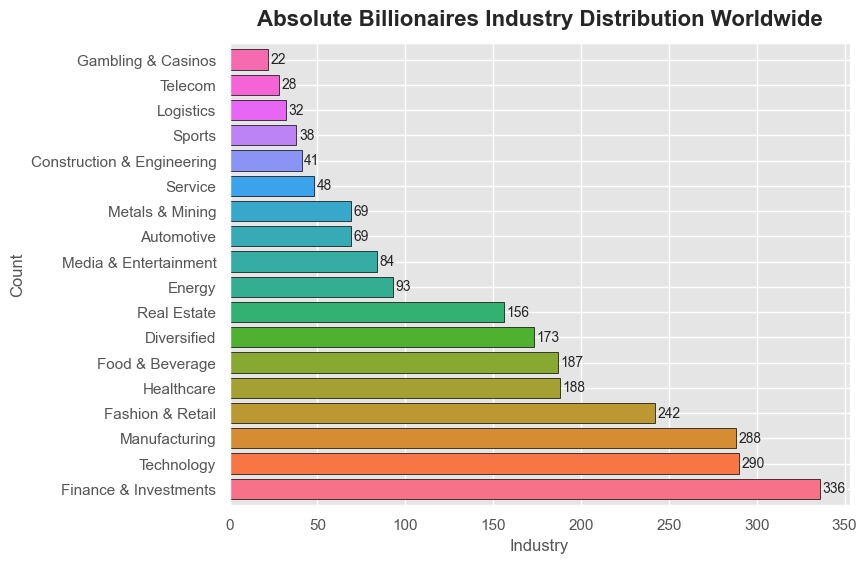

In [105]:
# Use a seaborn color palette
colors = sns.color_palette('husl', len(industry_counts))

# Create the horizontal bar plot
ax = industry_counts.plot(kind='barh', figsize=(8, 6), color=colors, edgecolor='black', width=0.8)

plt.title('Absolute Billionaires Industry Distribution Worldwide',
          fontsize=16,
          fontweight='bold',
          y=1.02)
ax.set_ylabel('Count')
ax.set_xlabel('Industry')

for i, count in enumerate(industry_counts):
    plt.text(count + 1.5, i, str(count), ha='left', va='center')

file_name_3 = "Absolute_Billionaires_Industry_Distribution_Worldwide.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_3), bbox_inches='tight')
plt.show()

<a id="age_hist"></a>
## 5. Feature: Age | Hist-Chart

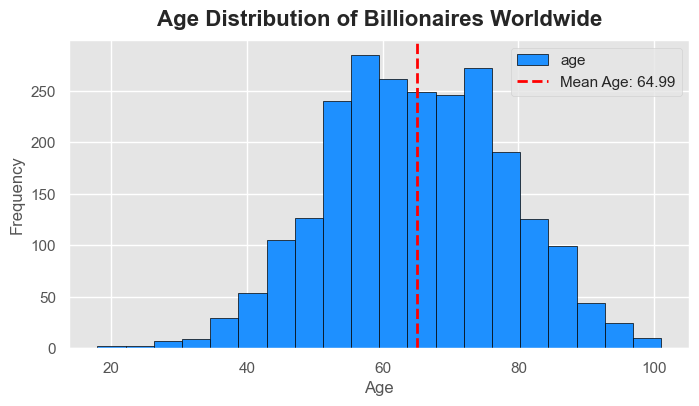

In [106]:
# Create the histogram plot
ax = df['age'].plot(kind='hist',
                    bins=20,
                    figsize=(8, 4),
                    color='dodgerblue',
                    edgecolor='black')

# Customize the plot
ax.set_title('Age Distribution of Billionaires Worldwide',
             fontsize=16,
             fontweight='bold',
             y=1.02)
ax.set_xlabel('Age')

# Add vertical line for mean age
mean_age = df['age'].mean()
ax.axvline(mean_age,
           color='red',
           linestyle='dashed',
           linewidth=2,
           label=f'Mean Age: {mean_age:.2f}')
ax.legend()

# Save and show the plot
file_name_4 = "Age_Distribution_of_Billionaires_Worldwide.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_4), bbox_inches='tight')
plt.show()


<a id="gender_pie"></a>
## 6. Feature: Gender | Pie-Chart

In [107]:
def create_pie_chart(data_val_counts, col_palette, title, file_name):
    ax = data_val_counts.plot(kind='pie',
                              autopct='%1.1f%%',
                              colors=col_palette,
                              wedgeprops=dict(width=0.4),
                              textprops=dict(fontsize=11, fontweight='bold'),
                              startangle=90,
                              shadow=True,
                              explode=(0, 0.1),
                              pctdistance=0.8
                              )
    # Customize the plot
    plt.title(title,
              fontweight='bold',
              fontsize=16,
              y=1.05)
    ax.set_ylabel('')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')

    # Save and show the plot
    plt.savefig(os.path.join(media_dir_univariate, file_name), bbox_inches='tight')
    plt.show()

In [108]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
M    2103
F     281
Name: count, dtype: int64

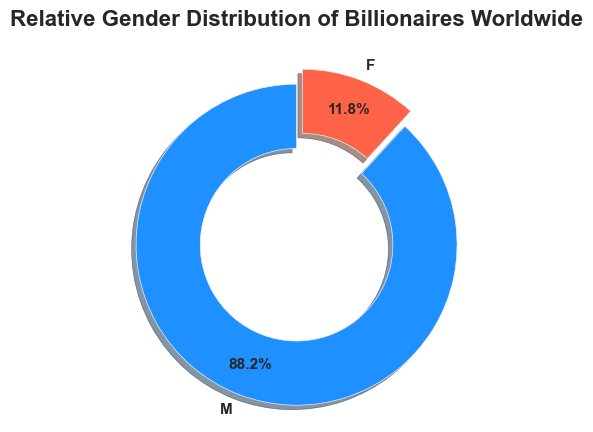

In [109]:
colors = ['dodgerblue', 'tomato']
gender_title = "Relative Gender Distribution of Billionaires Worldwide"
file_name_5 = "Relative_Gender_Distribution_of_Billionaires_Worldwide.png"

create_pie_chart(gender_counts, colors, gender_title, file_name_5)

<a id="wealth_source_pie"></a>
## 7. Feature: Wealth-Source | Pie-Chart

In [110]:
wealth_source_counts = df['wealth_source'].value_counts()
wealth_source_counts

wealth_source
Self-Made             1679
Inherited/Unearned     705
Name: count, dtype: int64

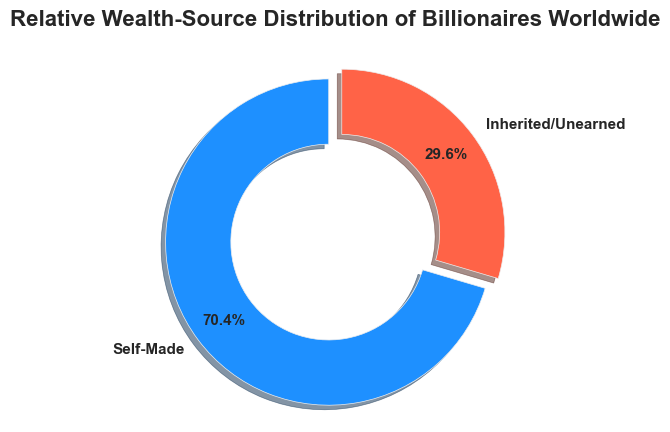

In [111]:
wealth_source_title = "Relative Wealth-Source Distribution of Billionaires Worldwide"
file_name_6 = "Relative_Wealth_Source_Distribution_of_Billionaires_Worldwide.png"

create_pie_chart(wealth_source_counts, colors, wealth_source_title, file_name_6)